In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools as it
import random
import math

## Algorithm Design 2019-20 @ Computer Science - Università di Pisa
# Randomized Approximation and Derandomization
### Scribe: Filippo Lari.  Lecturer: Roberto Grossi.

## Approximation algorithms

Many optimization problems of practical interest fall into the class of NP-Hard problems, therefore algorithms which output the optimal solution in polynomial time in the size of the inputs are not yet known. One possible method of approaching such problems is through the use of so-called approximation algorithms, which are guaranteed to compute a feasible solution close to the optimal one within a factor $r\, >\, 1$. Formally if we denote with $OPT$ the optimal value for the considered problem's instance and with $COST(S)$ the value of a computed solution $S$, an approximation algorithm provide an r-approximation if for every problem's instance the following inequality hold:

\begin{equation}
\quad \quad max\{\frac{COST(S)}{OPT},\, \frac{OPT}{COST(S)}\}\, \leq\, r
\end{equation}

Clearly we are interested in those approximation algorithms which runs in polynomial time.

## Randomized approximation algorithms

As we saw during the course, randomization is a powerfull tool that can help us design very efficient algorithms. Even in the domain of approximation algorithm we can use randomness to obtain an r-approximation for a give problem. In this case we have to ensure that on average the value of the computed solution is close to the optimal one within a factor $r\, >\, 1$. In other words, if we denote with $COST(S)$ the expected value of our solution the above inequality holds.

In this Lecture, using the **MAX-CUT** problem as a case study, we will design a randomized 2-approximation algorithm and we will also see two different methods that allow us to remove randomness from that algorithm, obtaining a deterministic one. First of all let's introduce our case study problem:

## MAX-CUT problem

Let $G\, =\, (V,\, E)\,$ be an unweighted graph, where $V$ is the set of nodes and $E$ is the set of edges. A cut for $G$ is a partition of $V$ into two disjoint subsets $S$ and $\bar S$ such that $S\, \subseteq\, V\,$ and $\bar S\, =\, V\, \setminus\, S$.

Given a cut $(S,\, \bar S)\,$ we are interested in those edges that cross it, that is, the set of edges having an endpoint in $S$ and the other one in $\bar S$. This set is called *cut-set* and we will denoted it as:

\begin{equation}
E(S,\, \bar S)\, =\, \{\{u,v\}\, \in\, E\, |\, u\, \in S,\, v\, \in\, \bar S\}
\end{equation}

While the cardinality of the aforementioned set is called *cut-size*, and we will simply denote it as $|E(S,\, \bar{S})|$.

**Example**: Let's consider the following graph:

<img src="graph_cut.png">

We have $S\, =\, \{1,\, 2,\, 3\}$ threfore $\bar{S}\, =\, \{4,\, 5,\, 6,\, 7\}$, our *cut-set* is $E(S,\, \bar S)\, =\, \{(1,5),\, (3,6),\, (3,4)\}$ and its size is 3.

The **MAX-CUT** problem, in its non-decisional formulation, asks to determine a cut $(S,\, \bar S)$ for a given unweighted graph $G$ such that $|E(S,\, \bar S)|$ is maximum. This problem arises in many real situations, and since it has been proven to be *NP-Hard*, the design of a good approximation algorithm (randomized or not) is of great interest.

## Randomized 2-approximation algorithm

We have seen two deterministic approaches to obtain a polynomial time 2-approximation algorithm for **MAX-CUT** in the previous lectures, one is based on a local search and the other one on a greedy strategy. It's also possible to design a randomized one by observing that a cut is fully determined by which nodes belong to $S$, so the basic idea is to toss a fair coin (i.e $P(Coin\, =\, Head)\, =\, P(Coin\, =\, Cross)\, =\, \frac{1}{2}$) for every node in $V$, then assign it to $S$ if the outcome is head and to $\bar S$ otherwise (or vice versa it doesn't matter).

It's easy to see that an algorithm based on this strategy always returns a feasible solution of the problem, but we are interested in the quality of such solution. Following the previous definition, to have a randomized 2-approximation, we have to show that the expected size of a computed cut is at least half the value of the optimal one.

*Proof*:

Consider an edge $\{i,\, j\}\, \in\, E$, the probability that this edge belong to the *cut-set* is:

\begin{equation}
P(\{i,\, j\}\, \in\, E(S,\, \bar S))\, =\, P(\{i\, \in S,\, j\, \in\, \bar S\}\ \cup\ \{i\, \in \bar S,\, j\, \in\, S\})\, =\, \frac{1}{4}\, + \frac{1}{4}\, =\, \frac{1}{2}
\end{equation}

Since each node is inserted in one of the two sets independently from the others, and the events in the union are mutually exclusive.

**Observation:** assigning a node to $S$ or $\bar S$ with any other probability $0 < p < 1$ different from $\frac{1}{2}$, we don't get an higher probability to have a given edge $\{i,\, j\}$ in the *cut-set* as that probability would be the following:

\begin{equation}
P(\{i,\, j\}\, \in\, E(S,\, \bar S))\, =\, p\,(1-p)\, +\, p\,(1-p)\, =\, 2p\,(1-p)
\end{equation}

which is maximum only for $p\, =\, \frac{1}{2}\,$.

Now for every edge $\{i,\, j\}\, \in\, E$ we define a random indicator variable for the event $\{i,\, j\}\, \in\, E(S,\, \bar S)$:

\begin{equation}
X_{i,j}\, =\,
\begin{cases}
1 & \text{If}\, \{i,\, j\}\, \in\, E(S,\, \bar S)\\
0 & \text{Otherwise}
\end{cases}
\end{equation}

We can now express the value of the *cut-size* computed by our algorithm $|E(S,\, \bar S)|$ as $\sum\limits_{\substack{\{i,\, j\} \in E \\ i<j}} X_{i,j}$ which allows us to easily compute its expected value:

\begin{align*}
 \mathbb{E}[|E(S,\, \bar S)|] &= \mathbb{E}[\sum\limits_{\substack{\{i,\, j\} \in E \\ i<j}} X_{i,j}]\\
 & \text{by linearity of the expected value} \\
 & = \sum\limits_{\substack{\{i,\, j\} \in E \\ i<j}} \mathbb{E}[X_{i,j}] \\
 & \text{by the definition of expected value of random indicator variables} \\
 & = \sum\limits_{\substack{\{i,\, j\} \in E \\ i<j}} \frac{1}{2} \\
 & \text{we are summing up over all the edges in $E$} \\
 & = \frac{|E|}{2}
\end{align*}

Now we don't know the optimal value $OPT$ for every instance of the problem, but we can use the quantity $|E|$ as an upper bound for it, as the size of each *cut-set* can't be larger than the total number of edges in the graph:

\begin{equation}
\frac{UB}{COST(S)}\, =\, \frac{2\, |E|}{|E|}\, =\, 2 
\end{equation}

Which, by transitivity, implies the following:

\begin{equation}
\frac{OPT}{COST(S)}\, \leq\, 2 
\end{equation}

$\square$

In conclusion this proves that the quality of a solution computed by such an algorithm is, on average, at least half the value of the optimal one. Therefore is a randomized 2-approximation for the **MAX-CUT** problem and it also has $\mathcal{O}(n)$ running time.

## Derandomization

Derandomization deals with removing dependencies on random choices in order to obtain a deterministic algorithm from a non deterministic one. A very simple, but inefficient way to do that is by enumerating all the possible solutions that a non deterministic algorithm can came up with, and then return the better one. Regarding the **MAX-CUT** problem and its randomized 2-approximation that we have developed before, we can build a deterministic algorithm from it simply by generating the power set of $V$, in other words enumerating all the possible cuts of the input graph. For each of them we proceed by computing their size and finally returning the cut with the maximal one.

Using this *brute force* technique we obtain an algorithm that exactly solves **MAX-CUT** and its running time is $\mathcal{O}(2^{n}\, poly(n))$, where the $poly(n)$ factor is needed for computing the size of a given cut.

Enumerationg all the possible random choices is not the most resource aware method to derandomize an algorithm, therefore we will see other two techniques that leads to more efficent algorithms, one based on *universal hash functions* and the other one on *conditional expectations*.

## Derandomization via universal hash functions

We can observe that our randomized 2-approximation basically chooses one solution at random among exponentially many. The idea of this method is to first develop a randomized algorithm that chooses among polynomially many solutions, where each of them on average have at least half the value of the optimal one. Then we can just enumerate all of them and select the maximal one. In this way we will only pay polynomial time. Before introducing this method, we briefly recall the definition of universal hash functions given in one of the first lectures:

**Definition**: Let $\mathscr{H}$ be a family of hash functions that map a universe of key $U$ in the interval \{0,1,..,$m-1$\}. Such a collection is called **universal** if for every distinct key $k,\, l\, \in\, U$ the number of hash functions $h\, \in\, \mathscr{H}$ such that $h(k)\, =\, h(l)$ is at most $\frac{|\mathscr{H}|}{m}$.

From this definition follows that randomly selecting an hash function $h\, \in\, \mathscr{H}$ the probaility that two different keys collide is at most $\frac{1}{m}$. Now let $p$ be a prime number, large enough such that every possible key $k$ is in the intervall that goes from $0$ to $p-1$. If we denote with $\mathbb{Z}_{p}\,$ the set $\{0,1,\dots,p-1\}$ and with $\mathbb{Z}_{p}^{*}$ the set $\{1,2,\dots,p-1\}$. Given $a\, \in\, \mathbb{Z}_{p}^{*}\, \text{and}\, b\, \in\, \mathbb{Z}_{p}$ we define the following hash function:

\begin{equation}
h_{ab}(k)\, =\, ((ak\,+\,b)\, \text{mod}\, p)\, \text{mod}\, m
\end{equation}

**Theorem**: The family of hash functions $\mathscr{H}_{pm}\, =\, \{ h_{ab}\, :\, a\, \in\, \mathbb{Z}_{p}^{*}\, \text{and}\, b\, \in\, \mathbb{Z}_{p} \}$ is universal.

Now, without loss of generality, we can assume to have all the nodes numbered from 0 up to $|V|-1$ (the ordering doesn't matter). Consider the above family of hash functions $\mathscr{H}_{pm}$ where $U\, =\, \{0,\dots,|V|-1\}$ and $m\, =\, 2\,$. Let $k$ be the closest power of 2 such that $2^{k-1}\, <\, n\, \leq\, 2^{k}$, we choose the prime number $p$ greater than $2^{k}$, but close to it within a constant factor. We can now use an hash function $h\, \in\, \mathscr{H}_{pm}$ to build a cut in this way, for every node $u\, \in\, V$ if $h(u)\, =\, 1$ then $u$ belongs to $S$, otherwise it belongs to $\bar{S}$.

**Theorem**: Building a cut according to the above strategy makes the probability for a given edge $\{i,j\}\, \in\, E$ to be in $E(S,\, \bar S)\,$ at least $\frac{1}{2}$.

*Proof:*
$P((i,\, j)\, \in\, E(S,\, \bar S))\, =\, P(h(i)\, \neq\, h(j))\, =\, 1\, -\, P(h(i)\, =\, h(j))\, \geq\, \frac{1}{2}\, \square $

**Theorem**: The number of possible choices of $h\, \in\, \mathscr{H}_{pm}$ is $\mathcal{O}(n^2)$.

*Proof:*
By the definition of $\mathscr{H}_{pm}$, choosing a function from it is equivalent to choose $a\, \in\, \mathbb{Z}_{p}^{*}\, \text{and}\, b\, \in\, \mathbb{Z}_{p}\,$. All the possible choices of $a\,$ and $b$ are $p\, (p-1)$, by construction we have chosen $p$ to be $\theta(2^k)$ and $n\, \leq\, 2^k$. Therefore they are $\mathcal{O}((2^{k})^2)\, =\, \mathcal{O}(n^2) \square$.

By this last consideration we can still use our *brute force* approach to derandomization by going throw all the possible hash functions $h\, \in\, \mathscr{H}_{pm}$, determine a cut, compute its size and finally return the maximal one. In this way we obtain a polynomial time algorithm, but we still have to show that it's a 2-approximation for **MAX-CUT**.

**Theorem**: Let $h\, \in\, \mathscr{H}_{pm}$ a cut determined by $h$ as an expected size greater or equal to $|E|/2$.

*Proof:*

Let $X_{i,j}$ be a random indicator variable for the event $\{i,j\}\, \in\, E(S,\, \bar S)$.

We have already proved that $P(X_{i,j}\, =\, 1)\, \geq\, \frac{1}{2}$.

Let $Y\, =\, \sum\limits_{\substack{\{i,j\} \in E \\ i<j}} X_{i,j}\, =\, |E(S,\, \bar S)|$.

We can compute the expected value of $Y$ in this way:

$\mathbb{E}[Y]\, =\, \mathbb{E}[\sum\limits_{\substack{\{i,j\} \in E \\ i<j}} X_{i,j}]\, =\, \sum\limits_{\substack{\{i,j\} \in E \\ i<j}} \mathbb{E}[X_{i,j}]\, \geq\, \sum\limits_{\substack{\{i,j\} \in E \\ i<j}} \frac{1}{2}\, =\, \frac{|E|}{2} \square$

As already mentioned, going throw all the possible cuts given by the functions in $\mathscr{H}_{pm}$ requires $\mathcal{O}(n^2))$ time, computing a cut induced by each of them requires $\mathcal{O}(poly(n))$ time, so the overall procedure has polynomial running time. Moreover the expected size of our cuts is at least half of the upper bound $|E|$ therefore, at least one has a size greater or equal to $|E|/2$. In conclusion the derandomized algorihm that we have obtained is a polynomial time 2-approximation for **MAX-CUT**.

We can now compare the two algorithms, aside from the main difference between a randomized algorithm and a deterministic one, we can observe that the algorithm we have derived is "slower" in therm of running time, but it shows an high level of parallelism. The choice of putting a node in $S$ or not, is independent from what we have done with other nodes. Therefore this operation could be done in parallel. Furthermore the construction of a cut with a given $h$ is independent from the construction of all the other cuts, therefore also this operation could be done in parallel.

## Derandomization via conditional expectations

Another method to derandomize an algorithm is via the use of *conditional
expectations*. Suppose nodes $v_{1},v_{2},\dots,v_{i}$ are already placed in $S$ and $\bar{S}$ in a deterministic way. Let us analyze the expected size of the resulting cut if we were allowed to make random choices from now on, and focus on the choice of $v_{i+1}\,$:

\begin{align*}
 \mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed}] & = \frac{1}{2}\, \mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed}\, \text{and}\, v_{i+1}\, \in\, S]\\
 & + \frac{1}{2}\, \mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed}\, \text{and}\, v_{i+1}\, \in\, \bar{S}] \\
\end{align*}

At least one of the two choices ($v_{i+1}\, \in S\, \text{or}\, v_{i+1}\, \in \bar{S}$) will not decrease the *cut-size*, therefore at least one of the following inequalities is true:

\begin{equation}
\mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed}\, \text{and}\, v_{i+1}\, \in\, S]\, \geq\, \mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed}]
\end{equation}

\begin{equation}
\mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed}\, \text{and}\, v_{i+1}\, \in\, \bar{S}]\, \geq\, \mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed}]
\end{equation}

Now assume that we know how to compute these expected values efficiently in both cases. We have already saw that making a random choice for every node guarantees that the resulting cut has an expected size of $|E|/2$. Now, starting from the beginning, we put a node in $S$ or $\bar{S}$ in such a way that the expected *cut-size* increases. Using this strategy, we have the following chain of inequalities.

\begin{align*}
 \frac{|E|}{2}\, & \leq\, \mathbb{E}[ \text{cut-size} |\, v_1\, \text{is placed according to the above strategy}]\\
 & \leq\, \mathbb{E}[\text{cut-size} |\, v_{1},v_{2}\, \text{are placed according to the above strategy}]\\
 & \leq\, \dots \\
 & \leq\, \mathbb{E}[\text{cut-size} |\, v_{1},v_{2},\dots,v_{n}\, \text{are placed according to the above strategy}]
\end{align*}

Therefore, the expected value of our solutions will be at least $|E|/2$. However to incorporate this nodes selection strategy into an algorithm, we need a way to find out which expectation is bigger. Consider the situation where nodes $v_{1},v_{2},\dots,v_{i}$ are somehow placed in $S$ or $\bar{S}$, and we are making the choice for $v_{i+1}$. Graphically we have the following scenario:

<img src="scheme.png">

Let us denote with $k$ the actual size of the cut, with $m_1$ and $m_2$ the edges that connects $v_{i+1}$
 respectively, to the nodes in $S$ and $\bar{S}$, and with $L$ the edges involving $v_{i+2},\dots,v_{n}$. Let's consider the two expected values:

\begin{equation}
 \mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed and}\, v_{i+1}\, \in\, S]\, =\, k\,+\,m_{2}\,+\,\frac{L}{2}
\end{equation}

\begin{equation}
 \mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed and}\, v_{i+1}\, \in\, \bar{S}]\, =\, k\,+\,m_{1}\,+\,\frac{L}{2}
\end{equation}

The two equations differs just by $m_1$ and $m_2$, therefore our greedy nodes selection strategy will be to compare $m_1$ and $m_2$ for every node $u\, \in\, V$ and put it in the set that leads to a larger value of the current *cut-size*. In this way we obtain a polynomial time algorithm. As already mentioned before, the expected size of the computed cut will be at least $|E|/2$, which implies that every computed cut has a size greater or equal to that quantity. In conclusion the presented algorithm is a polynomial time 2-approximation for **MAX-CUT**.

## Python code implementation



We will now see a python code implementation of the algorithms described in this lecture. First of all let's start with the one that exactly solves **MAX-CUT** by enumerating all the possible cuts and then returns the maximal *cut-size*.

In [7]:
def exact_solution(G):
    
    #the set of nodes in G
    nodes = G.nodes()

    max_size = 0
    
    n = G.number_of_nodes()
    
    for i in range(n):
        # generates all the subsets of V of cardinality i
        subsets = it.combinations(nodes, i)
        
        #for each subset S computes |E(S,V\S)|
        for S in subsets:
            cut_size = nx.cut_size(G, S)
            if cut_size > max_size: max_size = cut_size
    
    return max_size

The following code implements the randomized 2-approximation.

In [8]:
def randomized_approximation(G):
    
    S = []
    
    n = G.number_of_nodes()
    
    for i in range(n):
        coin_flip = random.randint(0, 1)
        if coin_flip: S.append(i)
        
    cut_size = nx.cut_size(G, S)
    
    return cut_size

Using the *getPrime(m)* function directly copied from the lecture on *Universal hashing*, the following code implements the derandomization method based on universal hash functions.

In [9]:
def getPrime( m ):   # naive method to find a prime in [m+1, 2m]
    def isPrime (x):
        for i in range(2, int(math.sqrt(x))):
            if x % i == 0:
                return False
        return True

    for p in range(m+1, 2*m+1):
        if isPrime(p):
            return p

def universal_hash_functions_derandomization(G):
    
    max_cut_size = 0

    n = G.number_of_nodes()
    
    k = math.ceil(math.log2(n)) # 2^(k-1) < n <= 2^k
    
    p = getPrime(2**k) # getPrime guarantees that p is theta(2^k)
    
    m = 2
    
    # for every hash function in H we compute
    # the corresponding cut and its size, if needed
    # we update the maximal size
    
    for a in range(1, p-1):
        for b in range(0, p-1):
            
            h = lambda u : ((a*u + b)%p)%m
    
            S = []
        
            for i in range(n):
                if h(i):
                    S.append(i)
            
            cut_size = nx.cut_size(G, S)
            
            if cut_size > max_cut_size:
                max_cut_size = cut_size
    
    return max_cut_size

This last piece of code implements the derandomization method based on conditional expectations. Before going through the implementation we should observe that when the algorithm starts $S$ is empty, so for every node $u\, \in V$ we have $m_1\, =\, 0$ and $m_2\, =\, |N(u)|$. Threfore, at the beginning we are free to choose any node to insert in $S$, as our strategy guarantees that the size of the resulting cut is at least half the optimum. But we have to be aware that this initial choice can make an impact on the quality of the solution. Anyway, for the sake of simplicty, the first node in $S$ will be the first node of the graph.

In [25]:
def conditional_expectance_derandomization(G):
    
    S = []
    bar_S = list(G.nodes())
    m1 = 0
    m2 = 0
    
    n = G.number_of_nodes()
    
    for i in range(1,n):
                
        for u in S:
            if G.has_edge(i, u):
                m1+=1
        
        for u in bar_S:
            if G.has_edge(i, u):
                m2+=1
                
        if m1 <= m2 :
            S.append(i)
            bar_S.remove(i)
            
        m1 = 0
        m2 = 0
        
    cut_size = nx.cut_size(G, S)
    
    return cut_size


Now we want to verify that our implementations are corrects, in this regard we should check that our two deterministic approximation compute a cut which size is at least half the optimal one, while for the randomized one, the same condition concerns the expected size. In order to carry out this test, the optimum will be computed through the *brute force* algorithm, therefore we will use only small graphs. For the sake of simplicity, each of these instances will be generated at random with a probability of having an edge $\{i,j\}$ of $0.5$ for every node $i,\,j$.

In [38]:
nodes        = []
half_max     = []
samples1     = []
samples2     = []
samples3     = []

count1       = 0
count2       = 0
count3       = 0

# in order to compute the expected value of a solution
# given by the randomized algorithm, we run it RUNS times
# on the same instance and take the average over all
# the results.

RUNS         = 2000

def compute_average(G, f):
    
    cut_size = 0
    
    for i in range(RUNS):
        cut_size += f(G)
    
    return cut_size/RUNS

for i in range(2, 16, 2):
    
    # G is a randomly constructed graph with i nodes
    G = nx.gnp_random_graph(i, 0.5)
    
    nodes.append(i)
    
    samples1.append(compute_average(G, randomized_approximation))
    samples2.append(universal_hash_functions_derandomization(G))
    samples3.append(conditional_expectance_derandomization(G)) 
    
    half_max.append(exact_solution(G)/2)

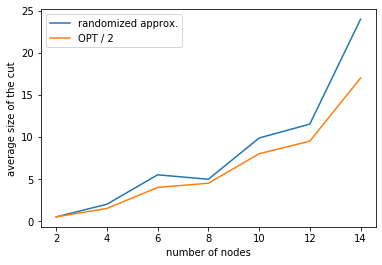

Number of times the approximation algorithm computes a size larger than OPT/2: 6
Number of times the approximation algorithm computes a size less than OPT/2: 1


In [39]:
for i in range(len(samples1)):
    if samples1[i] >= half_max[i]:
        count1+=1
    if samples2[i] >= half_max[i]:
        count2+=1
    if samples3[i] >= half_max[i]:
        count3+=1

plt.plot(nodes, samples1)
plt.plot(nodes, half_max)
plt.xlabel('number of nodes')
plt.ylabel('average size of the cut')
plt.gca().legend(('randomized approx.','OPT / 2'))
plt.show()

print("Number of times the approximation algorithm computes a size larger than OPT/2: %i"%count1)
print("Number of times the approximation algorithm computes a size less than OPT/2: %i"%(len(samples1)-count1))

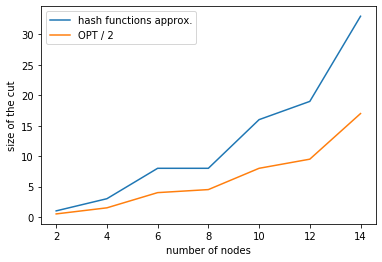

Number of times the hash functions algorithm computes a size larger than OPT/2: 7
Number of times the hash functions algorithm computes a size less than OPT/2: 0


In [40]:
plt.plot(nodes, samples2)
plt.plot(nodes, half_max)
plt.xlabel('number of nodes')
plt.ylabel('size of the cut')
plt.gca().legend(('hash functions approx.','OPT / 2'))
plt.show()

print("Number of times the hash functions algorithm computes a size larger than OPT/2: %i"%count2)
print("Number of times the hash functions algorithm computes a size less than OPT/2: %i"%(len(samples1)-count2))

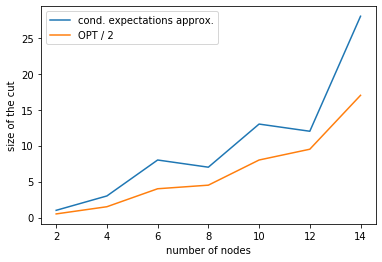

Number of times the cond. expectations algorithm computes a size larger than OPT/2: 7
Number of times the cond. expectations algorithm computes a size less than OPT/2: 0


In [41]:
plt.plot(nodes, samples3)
plt.plot(nodes, half_max)
plt.xlabel('number of nodes')
plt.ylabel('size of the cut')
plt.gca().legend(('cond. expectations approx.','OPT / 2'))
plt.show()

print("Number of times the cond. expectations algorithm computes a size larger than OPT/2: %i"%count3)
print("Number of times the cond. expectations algorithm computes a size less than OPT/2: %i"%(len(samples1)-count3))

## Comparison between the presented algorithms

Even if the above test is not exhaustive, we can assume that the three implementations are corrects. 
At this point, an interesting thing to see is which algorithm provides the best quality solution over a given set of instances.


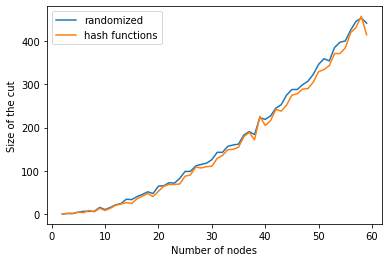

Number of times the randomized algorithm beats the others: 0
Number of times the hash functions algorithm beats the others: 55
Number of times the conditional exp. algorithm beats the others: 7


In [45]:
nodes        = []
samples1     = []
samples2     = []
samples3     = []

count1       = 0
count2       = 0
count3       = 0

START        = 2
LIMIT        = 40

for i in range(START, LIMIT):
    G = nx.gnp_random_graph(i, 0.50)
    nodes.append(i)
    
    result1 = randomized_approximation(G)
    result2 = universal_hash_functions_derandomization(G)
    result3 = conditional_expectance_derandomization(G)
    
    max_value = max(result1, result2, result3)

    if max_value==result1:
        count1+=1
    if max_value==result2:
        count2+=1
    if max_value==result3:
        count3+=1
    
    samples1.append(result1)
    samples2.append(result2)
    samples3.append(result3)

plt.plot(nodes, samples1)
plt.plot(nodes, samples2)
plt.plot(nodes, samples3)
plt.xlabel("Number of nodes")
plt.ylabel("Size of the cut")
plt.gca().legend(('randomized','hash functions','cond. expectation'))
plt.show()

print("Number of times the randomized algorithm beats the others: %i"%count1)
print("Number of times the hash functions algorithm beats the others: %i"%count2)
print("Number of times the conditional exp. algorithm beats the others: %i"%count3)

## Conclusions

In this lecture using the *MAX-CUT* problem as a case study, we saw how randomness can be exploited to design approximation algorithms. Furthermore, two techniques for derandomization were presented. The algorithms thus obtained provide better guarantees on the quality of the computed solutions. However, the analysis and the experiments carried out show that the approximated agorithm is the fastest but also the "least accurate", while the one based on hash functions turns out to be the slowest but also the "most accurate". The one based on *conditional expectations* seems to be a good tradeoff between speed and accuracy.

Finally, we can underline the fact that the algorithm based on hash functions shows a high degree of parallelism, therefore an implementation that exploits this feature could greatly reduce the processing time while leaving the quality of the computed solutions unchanged.

## References

- T. H. Cormen, C. E. Leiserson, R. L. Rivest, C. Stein, *Introduction to Algorithms*, 3rd ed, MIT Press. (Chapter 35)

- Jin-Yi Cai, CS 810: Introduction to Complexity Theory, *Lecture 19: Randomized Algorithms: MAXCUT*, University of Wisconsin.

- Pavan Aduri, Com S 633: Randomness in Computation, *Derandomization*, Iowa State University.